<IPython.core.display.Javascript object>


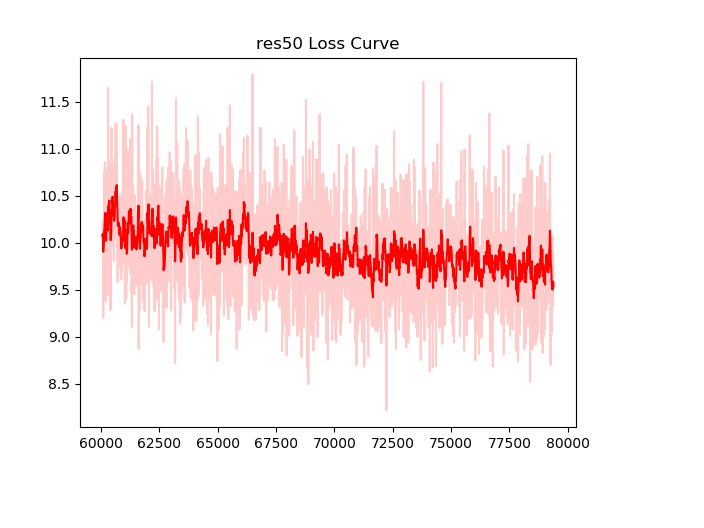

KeyboardInterrupt: 

In [1]:
%matplotlib notebook
from matplotlib import pyplot as plt
import numpy as np
import os
import argparse
import time
def smooth(ax, X, Y, weight=0.85):
    scalar = Y
    last = scalar[0]
    smoothed = []
    for point in scalar:
        smoothed_val = last * weight + (1 - weight) * point
        smoothed.append(smoothed_val)
        last = smoothed_val
    ax.plot(X, smoothed, 'r-')

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()
weight = 0.85
log = 'res50.log'
if not os.path.exists(log):
    print("{} doesn't exist.".format(log))
while True:
    X = []
    Y = []
    ax.clear()
    with open(log, 'r') as f:
        for line in f.readlines():
            if 'Iteration' in line and 'loss' in line:
                line = line.split(' ')
                x = line[line.index('Iteration') + 1][0: -1]
                y = line[line.index('loss')+ 2]
                X.append(int(x))
                Y.append(float(y))
    ax.plot(X[6000:], Y[6000:],'r-',alpha=0.2)
    plt.title('{} Loss Curve'.format(log[:-4]))
    smooth(ax, X[6000:], Y[6000:], weight=weight)
    fig.canvas.draw()
    time.sleep(100)

